In [1]:
from main import train_cnce, get_mnist_data, GaussianEBM, NoiseDataset
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
mnist_train, mnist_test, mnist_mean = get_mnist_data("../../data", add_noise=True)

## Train using cNCE with masking precision matrix

In [11]:
precision_matrix, losses = train_cnce(batch_size=10000, mnist_data_path="../../data/", max_steps=5000, 
                                     mask_precision_matrix=True)
precision_matrix = precision_matrix.cpu().detach().numpy()

Loaded 60000 training examples
0: Loss: 0.21080709699766778
1: Loss: 0.1986541363593063
2: Loss: 0.19612913499409712
3: Loss: 0.20057217165914434
4: Loss: 0.20494174367350815
5: Loss: 0.1884054810006213
6: Loss: 0.20534981856922077
7: Loss: 0.1938688112658265
8: Loss: 0.19116820167500112
9: Loss: 0.1955192863147947
10: Loss: 0.20017962303619008
11: Loss: 0.18378404900494233
12: Loss: 0.20029807580032574
13: Loss: 0.18936496686838789
14: Loss: 0.18645760014562987
15: Loss: 0.1906976599913129
16: Loss: 0.19562882742810503
17: Loss: 0.17935557520951426
18: Loss: 0.19548551413475324
19: Loss: 0.1850736568266176
20: Loss: 0.18196962216737952
21: Loss: 0.18610416997409088
22: Loss: 0.1912928275517206
23: Loss: 0.17513281623810437
24: Loss: 0.19090771127298953
25: Loss: 0.18099116519503566
26: Loss: 0.17770295234818778
27: Loss: 0.18174011180192887
28: Loss: 0.1871721737577379
29: Loss: 0.17111905132916091
30: Loss: 0.1865620608780706
31: Loss: 0.17711434547517793
32: Loss: 0.1736545901534865

270: Loss: 0.10826537622703666
271: Loss: 0.10589441603402631
272: Loss: 0.10069000009030443
273: Loss: 0.10318019396343389
274: Loss: 0.11045652791921508
275: Loss: 0.0978455257212577
276: Loss: 0.10730820453277
277: Loss: 0.10499396856998287
278: Loss: 0.09979773182320872
279: Loss: 0.10226708170338612
280: Loss: 0.10951854379311125
281: Loss: 0.09697744312169018
282: Loss: 0.10637103950519282
283: Loss: 0.10411138604159759
284: Loss: 0.09892392417098293
285: Loss: 0.10137304754237263
286: Loss: 0.10859910258708735
287: Loss: 0.09612710552958847
288: Loss: 0.105453114545643
289: Loss: 0.10324600384577712
290: Loss: 0.09806785893274551
291: Loss: 0.10049737243540072
292: Loss: 0.10769753652390596
293: Loss: 0.0952938551113662
294: Loss: 0.10455370800602075
295: Loss: 0.1023971962295052
296: Loss: 0.09722886103172079
297: Loss: 0.09963937920037348
298: Loss: 0.10681321520149423
299: Loss: 0.09447707199256258
300: Loss: 0.10367213974094604
301: Loss: 0.10156437329793803
302: Loss: 0.096

536: Loss: 0.07296917541352828
537: Loss: 0.07502745849389629
538: Loss: 0.08104877669845179
539: Loss: 0.0709002269389266
540: Loss: 0.0782130431580874
541: Loss: 0.07716162531769412
542: Loss: 0.07252206840851654
543: Loss: 0.07457881260384744
544: Loss: 0.08057192831697277
545: Loss: 0.07046778751791942
546: Loss: 0.07774516524517891
547: Loss: 0.07670739925682633
548: Loss: 0.07208044237359866
549: Loss: 0.07413586753396205
550: Loss: 0.08010088295528926
551: Loss: 0.07004074595572081
552: Loss: 0.07728307762026546
553: Loss: 0.07625862987811048
554: Loss: 0.07164418843770404
555: Loss: 0.0736985063777932
556: Loss: 0.07963552618975181
557: Loss: 0.06961899304091376
558: Loss: 0.07682666366633606
559: Loss: 0.07581521335634019
560: Loss: 0.0712132009188191
561: Loss: 0.07326661559155587
562: Loss: 0.0791757468319323
563: Loss: 0.06920242268839444
564: Loss: 0.07637581014766547
565: Loss: 0.07537704878778613
566: Loss: 0.07078737719512276
567: Loss: 0.07284008486455991
568: Loss: 0.

801: Loss: 0.05948185617718736
802: Loss: 0.06437911567531694
803: Loss: 0.05585907051268442
804: Loss: 0.061909728418737785
805: Loss: 0.061264834869554426
806: Loss: 0.057088756681875616
807: Loss: 0.05920542614876877
808: Loss: 0.06408017733714187
809: Loss: 0.055590619246789555
810: Loss: 0.061618241102960054
811: Loss: 0.060980036983552574
812: Loss: 0.056812315347926676
813: Loss: 0.05893160487343336
814: Loss: 0.06378398630552193
815: Loss: 0.055324673538393224
816: Loss: 0.06132945878884884
817: Loss: 0.060697891764377156
818: Loss: 0.056538437938050794
819: Loss: 0.05866035268289382
820: Loss: 0.06349050273603753
821: Loss: 0.05506119623837657
822: Loss: 0.061043341633099955
823: Loss: 0.06041836159032495
824: Loss: 0.056267087728923214
825: Loss: 0.05839163073221533
826: Loss: 0.06319968758514832
827: Loss: 0.05480015096681368
828: Loss: 0.06075985060296584
829: Loss: 0.06014140954608079
830: Loss: 0.055998228719468315
831: Loss: 0.05812540097803314
832: Loss: 0.0629115025893

1062: Loss: 0.05140967271564466
1063: Loss: 0.051022925724543006
1064: Loss: 0.04713792725701975
1065: Loss: 0.049353666463374156
1066: Loss: 0.05338708466206449
1067: Loss: 0.04601154169284374
1068: Loss: 0.05120642631014038
1069: Loss: 0.05082523400808086
1070: Loss: 0.046945641004929206
1071: Loss: 0.04916305284382067
1072: Loss: 0.053179694468635325
1073: Loss: 0.0458261764453038
1074: Loss: 0.05100470574150417
1075: Loss: 0.05062905455847951
1076: Loss: 0.046754818042575814
1077: Loss: 0.04897386573460378
1078: Loss: 0.05297384937627206
1079: Loss: 0.045642207330912725
1080: Loss: 0.0508044928754141
1081: Loss: 0.050434369450140654
1082: Loss: 0.046565441183913016
1083: Loss: 0.04878608771631155
1084: Loss: 0.05276953137320582
1085: Loss: 0.045459617916754354
1086: Loss: 0.05060576987164078
1087: Loss: 0.050241161041061584
1088: Loss: 0.0463774935136331
1089: Loss: 0.048599701657775746
1090: Loss: 0.05256672273411776
1091: Loss: 0.04527839203624017
1092: Loss: 0.050408519177991794

1317: Loss: 0.042403983794836536
1318: Loss: 0.045827995473618904
1319: Loss: 0.03926528047116249
1320: Loss: 0.043855392235936
1321: Loss: 0.043697000939268066
1322: Loss: 0.040007843678649097
1323: Loss: 0.04226103091411881
1324: Loss: 0.04567272919531952
1325: Loss: 0.039126932948173425
1326: Loss: 0.04370438865408741
1327: Loss: 0.04355108386424818
1328: Loss: 0.03986574840738238
1329: Loss: 0.0421189659934725
1330: Loss: 0.045518444275852284
1331: Loss: 0.03898946904768939
1332: Loss: 0.04355433738258815
1333: Loss: 0.04340611001660039
1334: Loss: 0.03972456906446581
1335: Loss: 0.04197777989756763
1336: Loss: 0.04536513099360171
1337: Loss: 0.03885287994782661
1338: Loss: 0.04340522892034541
1339: Loss: 0.04326206994995734
1340: Loss: 0.039584296513744635
1341: Loss: 0.041837463619848296
1342: Loss: 0.04521277975702493
1343: Loss: 0.03871715694453247
1344: Loss: 0.0432570538969212
1345: Loss: 0.043118954347239905
1346: Loss: 0.03944492174210252
1347: Loss: 0.04169800828030989
134

1572: Loss: 0.038237046337645596
1573: Loss: 0.038284942089394015
1574: Loss: 0.03473576781888229
1575: Loss: 0.03696010049615812
1576: Loss: 0.039931927446784456
1577: Loss: 0.03401821283671409
1578: Loss: 0.03811914303190723
1579: Loss: 0.038171775202450006
1580: Loss: 0.03462548554915294
1581: Loss: 0.03684843401980158
1582: Loss: 0.0398114537485363
1583: Loss: 0.03391113653055732
1584: Loss: 0.03800188413540883
1585: Loss: 0.03805924478029523
1586: Loss: 0.03451582146740522
1587: Loss: 0.03673735630301872
1588: Loss: 0.03969163850070806
1589: Loss: 0.033804650529433676
1590: Loss: 0.03788526413047157
1591: Loss: 0.03794734530670846
1592: Loss: 0.034406770200871226
1593: Loss: 0.03662686219459919
1594: Loss: 0.03957247604445026
1595: Loss: 0.0336987496862897
1596: Loss: 0.03776927756530908
1597: Loss: 0.03783607133049761
1598: Loss: 0.03429832643960492
1599: Loss: 0.03651694660720781
1600: Loss: 0.03945396078704996
1601: Loss: 0.033593428914063514
1602: Loss: 0.0376539190530041
1603

1826: Loss: 0.03058081966852854
1827: Loss: 0.03272429468284992
1828: Loss: 0.035380659567212015
1829: Loss: 0.029976226571616835
1830: Loss: 0.03368826369175395
1831: Loss: 0.033932591381918856
1832: Loss: 0.03049250597961181
1833: Loss: 0.03263355783971446
1834: Loss: 0.03528363290373206
1835: Loss: 0.029890115119106192
1836: Loss: 0.03359379055071028
1837: Loss: 0.0338425072483781
1838: Loss: 0.030404629948700416
1839: Loss: 0.032543238850818036
1840: Loss: 0.03518707455508041
1841: Loss: 0.029804421004609515
1842: Loss: 0.03349977343532429
1843: Loss: 0.03375287081586212
1844: Loss: 0.030317188207493333
1845: Loss: 0.032453334570750725
1846: Loss: 0.035090980972778504
1847: Loss: 0.029719141000522455
1848: Loss: 0.033406208929331105
1849: Loss: 0.03366367865455093
1850: Loss: 0.030230177422989852
1851: Loss: 0.03236384188850859
1852: Loss: 0.034995348645378725
1853: Loss: 0.029634271912935894
1854: Loss: 0.03331309365152459
1855: Loss: 0.03357492736959029
1856: Loss: 0.030143594297

2079: Loss: 0.02924049071886059
2080: Loss: 0.03167179622576188
2081: Loss: 0.026685250377285388
2082: Loss: 0.030077377575892024
2083: Loss: 0.030498701678092984
2084: Loss: 0.027140930792797873
2085: Loss: 0.029164942811944965
2086: Loss: 0.03159176086357285
2087: Loss: 0.026614230921374635
2088: Loss: 0.02999947260099141
2089: Loss: 0.03042482217566524
2090: Loss: 0.027068781016607323
2091: Loss: 0.029089705538589753
2092: Loss: 0.031512071909627154
2093: Loss: 0.026543517874724514
2094: Loss: 0.029921905798201004
2095: Loss: 0.030351271744810792
2096: Loss: 0.026996951139367745
2097: Loss: 0.0290147768618947
2098: Loss: 0.03143272703167352
2099: Loss: 0.026473109112777157
2100: Loss: 0.029844674900883265
2101: Loss: 0.030278048091399952
2102: Loss: 0.026925438976445407
2103: Loss: 0.028940154764645624
2104: Loss: 0.0313537239195156
2105: Loss: 0.026403002530940564
2106: Loss: 0.029767777663386414
2107: Loss: 0.03020514894170835
2108: Loss: 0.02685424236406575
2109: Loss: 0.02886583

2331: Loss: 0.026313564428190963
2332: Loss: 0.028584057198914825
2333: Loss: 0.02394391720933588
2334: Loss: 0.02707267919980273
2335: Loss: 0.027654856770840848
2336: Loss: 0.024363134799416954
2337: Loss: 0.026249510922036475
2338: Loss: 0.028516789449235046
2339: Loss: 0.023884143793934953
2340: Loss: 0.027007243062461887
2341: Loss: 0.027593033633401067
2342: Loss: 0.024302754229623115
2343: Loss: 0.026185697018211145
2344: Loss: 0.028449786468891562
2345: Loss: 0.02382460244713687
2346: Loss: 0.02694206559521597
2347: Loss: 0.027531458436900833
2348: Loss: 0.024242617259286087
2349: Loss: 0.02612212133317309
2350: Loss: 0.028383046658558893
2351: Loss: 0.023765291718916823
2352: Loss: 0.02687714524231337
2353: Loss: 0.027470129577678824
2354: Loss: 0.02418272239972038
2355: Loss: 0.02605878249540383
2356: Loss: 0.028316568432174165
2357: Loss: 0.023706210171981476
2358: Loss: 0.02681248046134222
2359: Loss: 0.0274090454651941
2360: Loss: 0.02412306817501873
2361: Loss: 0.02599567

2582: Loss: 0.022072606292674827
2583: Loss: 0.023814973443670857
2584: Loss: 0.0259697667715951
2585: Loss: 0.021617927048068857
2586: Loss: 0.02453059848501681
2587: Loss: 0.02525472482362465
2588: Loss: 0.02202111530961062
2589: Loss: 0.023759916572042353
2590: Loss: 0.025912376975298093
2591: Loss: 0.02156678571766032
2592: Loss: 0.02447482575807641
2593: Loss: 0.02520207264852938
2594: Loss: 0.02196981598229195
2595: Loss: 0.02370505019955242
2596: Loss: 0.025855194429627283
2597: Loss: 0.02151582526901221
2598: Loss: 0.024419256405715035
2599: Loss: 0.025149611110202887
2600: Loss: 0.021918707243626996
2601: Loss: 0.02365037335074597
2602: Loss: 0.025798217964785628
2603: Loss: 0.02146504469712105
2604: Loss: 0.024363889328638408
2605: Loss: 0.025097339065734393
2606: Loss: 0.021867788034597404
2607: Loss: 0.023595885057831223
2608: Loss: 0.025741446418529476
2609: Loss: 0.02141444300567776
2610: Loss: 0.024308723436204736
2611: Loss: 0.025045255381208914
2612: Loss: 0.0218170573

2834: Loss: 0.02006358781505454
2835: Loss: 0.02165620112205201
2836: Loss: 0.023725182907951798
2837: Loss: 0.019615105287166586
2838: Loss: 0.022351529380254965
2839: Loss: 0.023195292165584462
2840: Loss: 0.020019311736113064
2841: Loss: 0.021608385136749047
2842: Loss: 0.023675568105541927
2843: Loss: 0.01957078754732133
2844: Loss: 0.02230344230177801
2845: Loss: 0.02314975737506952
2846: Loss: 0.019975188593822944
2847: Loss: 0.02156072445669953
2848: Loss: 0.02362611704914039
2849: Loss: 0.019526615158338336
2850: Loss: 0.02225551897981123
2851: Loss: 0.023104372096479968
2852: Loss: 0.01993121759931939
2853: Loss: 0.021513218368705646
2854: Loss: 0.02357682882667945
2855: Loss: 0.019482587420926855
2856: Loss: 0.02220775861333685
2857: Loss: 0.02305913550124929
2858: Loss: 0.01988739796912807
2859: Loss: 0.021465866164533626
2860: Loss: 0.023527702531312977
2861: Loss: 0.019438703641685654
2862: Loss: 0.022160160407025193
2863: Loss: 0.02301404676688118
2864: Loss: 0.0198437289

3086: Loss: 0.018327182870043538
3087: Loss: 0.019773975419415724
3088: Loss: 0.021772447730105483
3089: Loss: 0.01787148887191226
3090: Loss: 0.02046426118061981
3091: Loss: 0.0214026814981977
3092: Loss: 0.018288708231061573
3093: Loss: 0.019732119978570845
3094: Loss: 0.02172898332646372
3095: Loss: 0.017832734888075248
3096: Loss: 0.020422421516074506
3097: Loss: 0.021362776470048164
3098: Loss: 0.018250357579661588
3099: Loss: 0.019690393643463033
3100: Loss: 0.021685648706062103
3101: Loss: 0.01779410129682863
3102: Loss: 0.020380716263849546
3103: Loss: 0.02132299077933036
3104: Loss: 0.01821213032029117
3105: Loss: 0.019648795872102297
3106: Loss: 0.021642443165815102
3107: Loss: 0.01775558759788717
3108: Loss: 0.02033914481864322
3109: Loss: 0.021283323809363236
3110: Loss: 0.01817402586128831
3111: Loss: 0.01960732612579686
3112: Loss: 0.021599366007414227
3113: Loss: 0.017717193294614336
3114: Loss: 0.020297706578897012
3115: Loss: 0.02124377494761783
3116: Loss: 0.018136043

3338: Loss: 0.01681157535500456
3339: Loss: 0.018121330567911317
3340: Loss: 0.020051138406915983
3341: Loss: 0.016342108554324754
3342: Loss: 0.01881616654036163
3343: Loss: 0.01982278000132204
3344: Loss: 0.016777836901125526
3345: Loss: 0.01808446574063255
3346: Loss: 0.020012572883981054
3347: Loss: 0.01630801753512448
3348: Loss: 0.018779490407552155
3349: Loss: 0.019787400608042092
3350: Loss: 0.01674420044993963
3351: Loss: 0.018047709791832126
3352: Loss: 0.019974111566291936
3353: Loss: 0.016274028572366223
3354: Loss: 0.018742926129433138
3355: Loss: 0.019752117903702623
3356: Loss: 0.016710665545792806
3357: Loss: 0.018011062296248246
3358: Loss: 0.019935753938351623
3359: Loss: 0.016240141285583962
3360: Loss: 0.018706473232355324
3361: Loss: 0.019716931422991975
3362: Loss: 0.016677231735829055
3363: Loss: 0.01797452283094427
3364: Loss: 0.019897499488724078
3365: Loss: 0.016206355296464938
3366: Loss: 0.018670131245282884
3367: Loss: 0.019681840703735916
3368: Loss: 0.016

3589: Loss: 0.018446855401756262
3590: Loss: 0.015477449032074193
3591: Loss: 0.01666211615117457
3592: Loss: 0.01851562345517648
3593: Loss: 0.014994009186563234
3594: Loss: 0.017366915739896092
3595: Loss: 0.018415090546332603
3596: Loss: 0.015447632175079402
3597: Loss: 0.016629482915466207
3598: Loss: 0.01848103465670073
3599: Loss: 0.014963899036784864
3600: Loss: 0.017334557738119837
3601: Loss: 0.018383405708390217
3602: Loss: 0.015417900359126937
3603: Loss: 0.01659694251444929
3604: Loss: 0.018446531634895784
3605: Loss: 0.01493387655468114
3606: Loss: 0.01730229375257359
3607: Loss: 0.01835180053867159
3608: Loss: 0.015388253229159888
3609: Loss: 0.01656449460719006
3610: Loss: 0.018412114024207827
3611: Loss: 0.014903941431437735
3612: Loss: 0.017270123405341682
3613: Loss: 0.018320274690441955
3614: Loss: 0.015358690432154464
3615: Loss: 0.01653213885447923
3616: Loss: 0.018377781462132276
3617: Loss: 0.01487409335957017
3618: Loss: 0.017238046320487314
3619: Loss: 0.018288

3840: Loss: 0.01611349504960871
3841: Loss: 0.017177886966867683
3842: Loss: 0.01429450107815142
3843: Loss: 0.015367720192388617
3844: Loss: 0.017132872025835036
3845: Loss: 0.013801458187715096
3846: Loss: 0.016084701867508527
3847: Loss: 0.017149209439981897
3848: Loss: 0.014267972060706504
3849: Loss: 0.015338710997788493
3850: Loss: 0.017101603440899577
3851: Loss: 0.013774778153051854
3852: Loss: 0.01605598871960822
3853: Loss: 0.017120599261592727
3854: Loss: 0.014241514770986527
3855: Loss: 0.015309781676326708
3856: Loss: 0.01707040763217875
3857: Loss: 0.01374817383317489
3858: Loss: 0.016027355300765198
3859: Loss: 0.01709205617521006
3860: Loss: 0.014215128928452612
3861: Loss: 0.015280931950272605
3862: Loss: 0.017039284341912764
3863: Loss: 0.013721644966267075
3864: Loss: 0.015998801307416138
3865: Loss: 0.017063579926193395
3866: Loss: 0.014188814254108324
3867: Loss: 0.015252161543196774
3868: Loss: 0.017008233314423433
3869: Loss: 0.013695191291476031
3870: Loss: 0.01

4091: Loss: 0.0127669666118064
4092: Loss: 0.014969757194570207
4093: Loss: 0.016028666173096683
4094: Loss: 0.013238984368562403
4095: Loss: 0.014215054702904769
4096: Loss: 0.015879507698121825
4097: Loss: 0.012743186090902307
4098: Loss: 0.014944079894051929
4099: Loss: 0.016002615790204767
4100: Loss: 0.013215243083829648
4101: Loss: 0.01418917503516615
4102: Loss: 0.01585109533767684
4103: Loss: 0.012719471303416257
4104: Loss: 0.014918471075061538
4105: Loss: 0.01597662338096898
4106: Loss: 0.013191562971109955
4107: Loss: 0.014163364600003616
4108: Loss: 0.015822746483210394
4109: Loss: 0.012695822024461283
4110: Loss: 0.014892930491718387
4111: Loss: 0.01595068875197098
4112: Loss: 0.013167943807178766
4113: Loss: 0.014137623167321676
4114: Loss: 0.01579446094708254
4115: Loss: 0.012672238030013069
4116: Loss: 0.014867457899388141
4117: Loss: 0.01592481171094621
4118: Loss: 0.013144385369989839
4119: Loss: 0.014111950508004994
4120: Loss: 0.01576623854293046
4121: Loss: 0.01264

4341: Loss: 0.01320840040225903
4342: Loss: 0.014764793959018741
4343: Loss: 0.011822294196899555
4344: Loss: 0.013947583789146668
4345: Loss: 0.014982362252648502
4346: Loss: 0.012292083048036346
4347: Loss: 0.013185180371977712
4348: Loss: 0.01473884362895866
4349: Loss: 0.011801090523552646
4350: Loss: 0.013924584507427886
4351: Loss: 0.014958591960852202
4352: Loss: 0.012270731538330366
4353: Loss: 0.01316202087599048
4354: Loss: 0.014712950007745081
4355: Loss: 0.011779943858523378
4356: Loss: 0.013901644370546438
4357: Loss: 0.014934872363648804
4358: Loss: 0.012249432757242308
4359: Loss: 0.01313892171937977
4360: Loss: 0.01468711294889512
4361: Loss: 0.011758854011509497
4362: Loss: 0.013878763178792095
4363: Loss: 0.01491120330566973
4364: Loss: 0.012228186524683108
4365: Loss: 0.013115882707978461
4366: Loss: 0.014661332306681792
4367: Loss: 0.01173782079299333
4368: Loss: 0.013855940733405896
4369: Loss: 0.014887584632265612
4370: Loss: 0.0122069926614269
4371: Loss: 0.01309

4591: Loss: 0.014047762916473345
4592: Loss: 0.01145807077183077
4593: Loss: 0.012283121761413596
4594: Loss: 0.013722102570211375
4595: Loss: 0.010978724408574475
4596: Loss: 0.013030345529616481
4597: Loss: 0.014025950918791177
4598: Loss: 0.011438741926840511
4599: Loss: 0.012262284481194612
4600: Loss: 0.01369841567435346
4601: Loss: 0.01095975988000971
4602: Loss: 0.013009668532879392
4603: Loss: 0.014004183792286108
4604: Loss: 0.011419459058113552
4605: Loss: 0.012241500146890153
4606: Loss: 0.013674779895682929
4607: Loss: 0.010940845006269575
4608: Loss: 0.012989043034933298
4609: Loss: 0.013982461408225533
4610: Loss: 0.011400222015202239
4611: Loss: 0.012220768591646097
4612: Loss: 0.01365119511293022
4613: Loss: 0.01092197962730531
4614: Loss: 0.01296846887038597
4615: Loss: 0.013960783638492541
4616: Loss: 0.011381030648242566
4617: Loss: 0.012200089649207883
4618: Loss: 0.013627661205288449
4619: Loss: 0.010903163583723821
4620: Loss: 0.012947945874530912
4621: Loss: 0.01

4841: Loss: 0.01024025314914055
4842: Loss: 0.012223120664399017
4843: Loss: 0.013168883604443023
4844: Loss: 0.010684179176207004
4845: Loss: 0.01145169076971736
4846: Loss: 0.012769920250713405
4847: Loss: 0.010223199847756693
4848: Loss: 0.012204426347322238
4849: Loss: 0.013148852353327602
4850: Loss: 0.010666657987191406
4851: Loss: 0.011432940027170635
4852: Loss: 0.012748280631321688
4853: Loss: 0.010206190139181743
4854: Loss: 0.012185777261958231
4855: Loss: 0.013128861089198621
4856: Loss: 0.010649176905799841
4857: Loss: 0.01141423569851661
4858: Loss: 0.012726687379715709
4859: Loss: 0.01018922388746355
4860: Loss: 0.012167173267375883
4861: Loss: 0.013108909708564797
4862: Loss: 0.010631735802273369
4863: Loss: 0.011395577639191723
4864: Loss: 0.012705140390126716
4865: Loss: 0.010172300957177333
4866: Loss: 0.012148614223159002
4867: Loss: 0.013088998108510712
4868: Loss: 0.010614334547263439
4869: Loss: 0.011376965705102129
4870: Loss: 0.012683639557072019
4871: Loss: 0.

### Let's generate some samples

In [12]:
eig_vals, eig_vecs = np.linalg.eig(precision_matrix)
eig_vals[eig_vals < 0] = 1.0
L = np.linalg.cholesky(eig_vecs @ np.diag(eig_vals) @ eig_vecs.T)

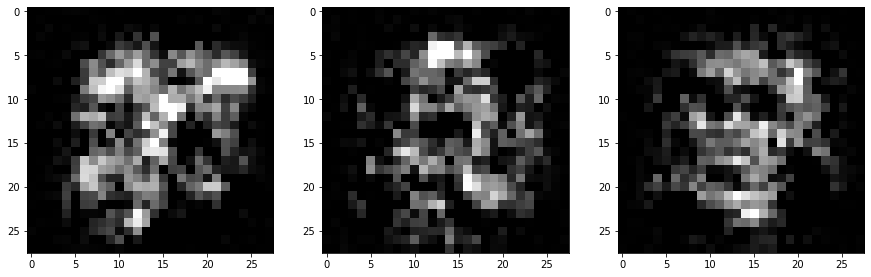

In [13]:
def get_sample_image():
    sample_image = mnist_mean + scipy.linalg.solve_triangular(L, np.random.normal(size=28*28), lower=True)
    sample_image[sample_image < 0] = 0
    sample_image[sample_image > 1] = 1
    return sample_image.reshape(28, 28)

fig, axs = plt.subplots(1,3, figsize=(15, 15))
axs[0].imshow(get_sample_image(), cmap='gray')
axs[1].imshow(get_sample_image(), cmap='gray')
axs[2].imshow(get_sample_image(), cmap='gray')

### For reference, here is a training example

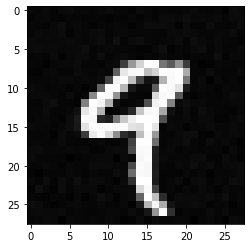

In [14]:
plt.imshow(mnist_train[4].reshape(28,28) + mnist_mean.reshape(28,28), cmap='gray')

### Loss curve during training

Text(0, 0.5, 'negative NCE log loss')

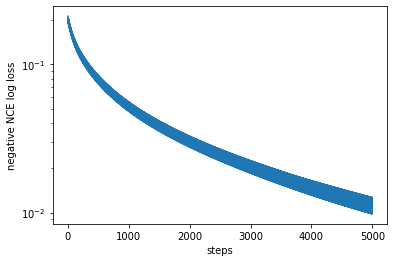

In [15]:
plt.plot(losses)
plt.yscale("log")
plt.xlabel("steps")
plt.ylabel("negative NCE log loss")

### Trained precision matrix

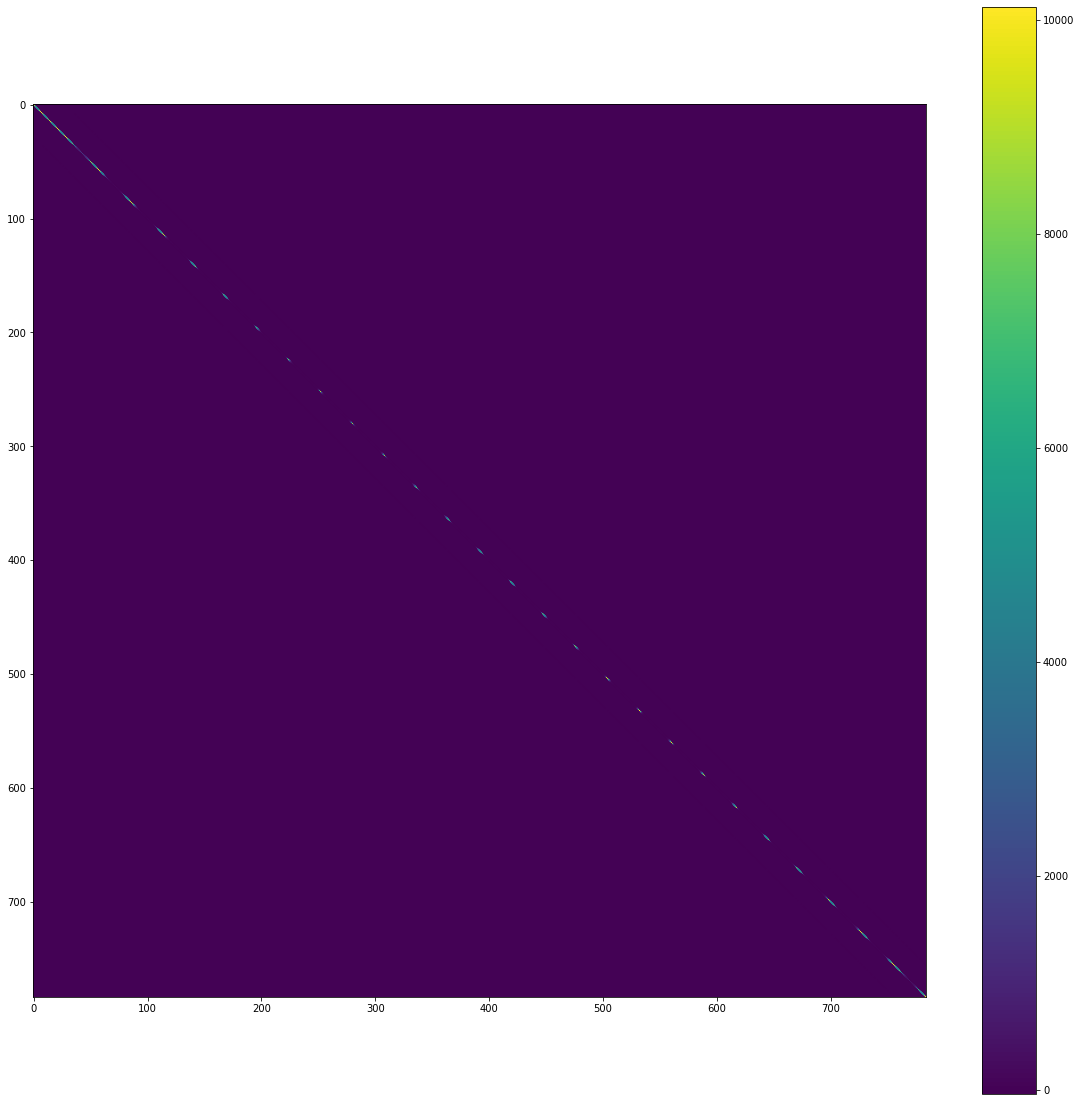

In [16]:
plt.figure(figsize = (20,20))
plt.imshow(precision_matrix)
plt.colorbar()

### Trained covariance matrix (inverse of precision matrix)

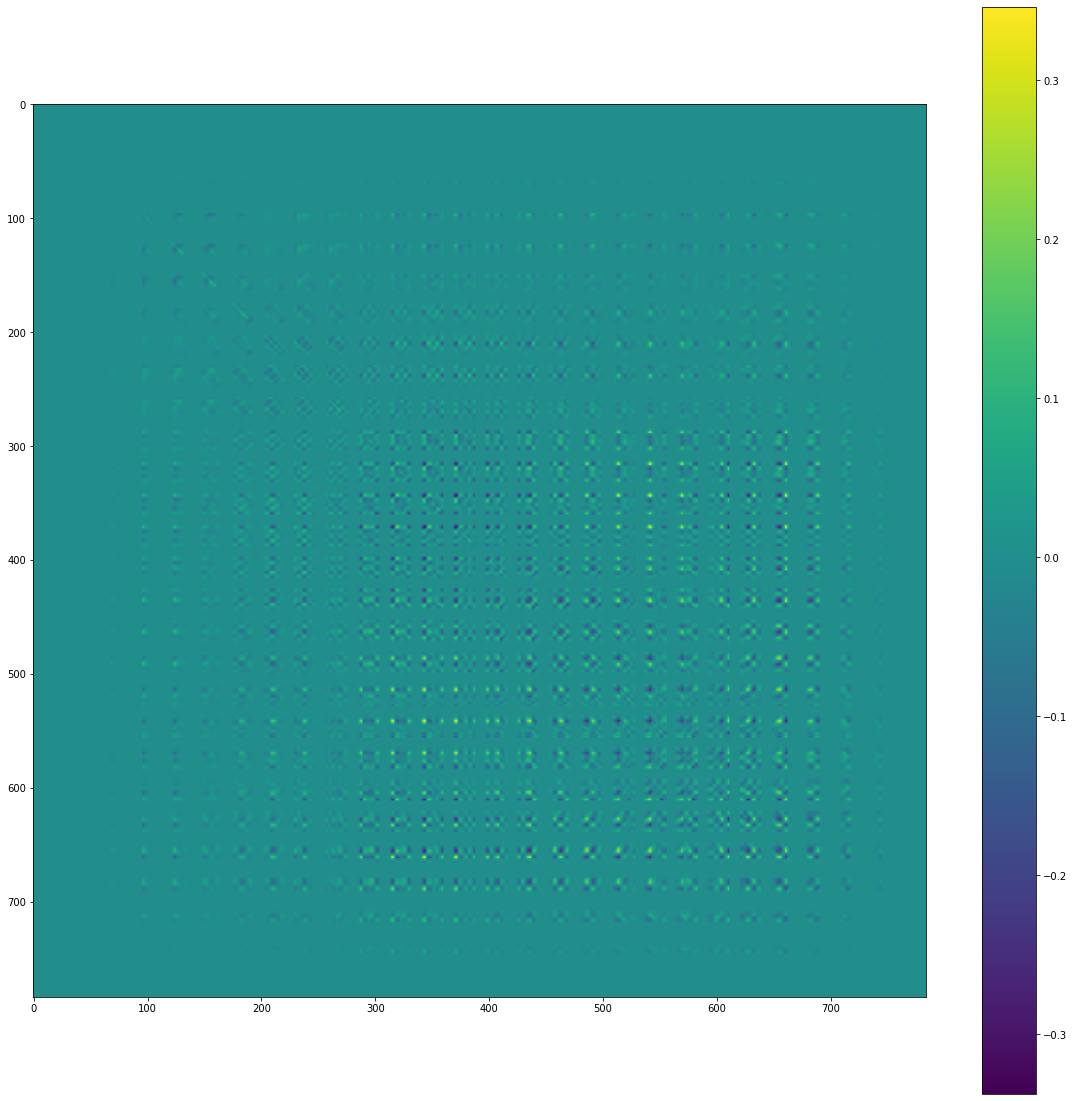

In [17]:
plt.figure(figsize = (20,20))
plt.imshow(np.linalg.inv(precision_matrix))
plt.colorbar()